In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class Main:
    def __init__(self, Path):
        self.Path = Path
    
    def Read_Image(self):
        self.Image_List = cv2.imread(self.Path, cv2.IMREAD_GRAYSCALE)
    
    def Fourier(self):
        self.Fourier_List = np.zeros_like(self.Image_List, dtype = np.complex64)
        for Frequency_Row in range(self.Image_List.shape[0]):
            for Frequency_Column in range(self.Image_List.shape[1]):
                for Spatial_Row in range(self.Image_List.shape[0]):
                    for Spatial_Column in range(self.Image_List.shape[1]):
                        self.Fourier_List[Frequency_Row, Frequency_Column] += self.Image_List[Spatial_Row, Spatial_Column] * np.exp(-2j * np.pi * (Frequency_Row * Spatial_Row / self.Image_List.shape[0] + Frequency_Column * Spatial_Column / self.Image_List.shape[1]))
        
    def Shift(self):
        shift_rows = (self.Fourier_List.shape[0] + 1) // 2
        shift_cols = (self.Fourier_List.shape[1] + 1) // 2

        self.Fourier_Shifted = np.empty_like(self.Fourier_List)
        self.Fourier_Shifted[:shift_rows, :shift_cols] = self.Fourier_List[-shift_rows:, -shift_cols:]
        self.Fourier_Shifted[:shift_rows, shift_cols:] = self.Fourier_List[-shift_rows:, :-shift_cols]
        self.Fourier_Shifted[shift_rows:, :shift_cols] = self.Fourier_List[:-shift_rows, -shift_cols:]
        self.Fourier_Shifted[shift_rows:, shift_cols:] = self.Fourier_List[:-shift_rows, :-shift_cols]
        
        self.Magnitude_Spectrum = np.log(1 + np.abs(self.Fourier_Shifted))
    
    def Inverse_Fourier(self):
        self.Inverse_Fourier_Shifted = np.zeros_like(self.Fourier_Shifted, dtype = np.complex64)
        for Spatial_Row in range(self.Image_List.shape[0]):
            for Spatial_Column in range(self.Image_List.shape[1]):
                self.Inverse_Sum = 0
                for Frequency_Row in range(self.Image_List.shape[0]):
                    for Frequency_Column in range(self.Image_List.shape[1]):
                        self.Inverse_Sum += self.Fourier_Shifted[Frequency_Row, Frequency_Column] * np.exp(2j * np.pi * (Frequency_Row * Spatial_Row / self.Image_List.shape[0] + Frequency_Column * Spatial_Column / self.Image_List.shape[1]))
                self.Inverse_Fourier_Shifted[Spatial_Row, Spatial_Column] = self.Inverse_Sum

        self.Magnitude = np.abs(self.Inverse_Fourier_Shifted)
        self.Magnitude_Normalized = (self.Magnitude - self.Magnitude.min()) / (self.Magnitude.max() - self.Magnitude.min())

        self.Inverse_Fourier_Uint8 = (self.Magnitude_Normalized * 255).astype(np.uint8)

    def Show_Image(self):
        plt.figure(figsize=(4 * 3, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(self.Image_List, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(self.Magnitude_Spectrum, cmap='gray')
        plt.title('Fourier')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(self.Inverse_Fourier_Uint8, cmap='gray')
        plt.title('Inverse Fourier')
        plt.axis('off')

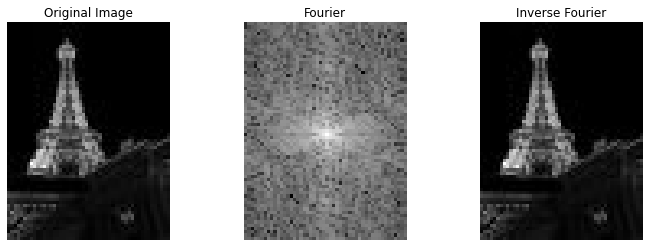

In [13]:
Path = '07.jpg'
Main = Main(Path)
Main.Read_Image()
Main.Fourier()
Main.Shift()
Main.Inverse_Fourier()
Main.Show_Image()